# **Imports**

In [7]:
import torch as ch
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor

import numpy as np
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD

from robustness.tools.vis_tools import show_image_row

# **Class Definition**

In [8]:
class DatamodelFunctions:
    def __init__(self, dm_path, ds_path):
        self.ds_train = CIFAR10(root = ds_path,
                                download = False,
                                train = True,
                                transform = ToTensor())
        self.ds_val = CIFAR10(root = ds_path,
                              download = False,
                              train = False,
                              transform = ToTensor())
        self.classes = {0: 'plane',
                        1: 'car', 
                        2: 'bird', 
                        3: 'cat',
                        4: 'deer', 
                        5: 'dog', 
                        6: 'frog', 
                        7: 'horse', 
                        8: 'ship', 
                        9: 'truck'}
        try:
            self.datamodels = ch.load(dm_path)['weight'].numpy()
        except:
            self.datamodels = ch.load(dm_path, map_location=ch.device('cpu'))['weight'].numpy()
           
        
    def PCA(self, n_components):
        embeds = csr_matrix(self.datamodels)
        svd = TruncatedSVD(n_components = n_components, random_state = 42)
        svd.fit(embeds)
        
        return svd.components_
    
    
    def vis_PCA(self, trans_embeds, N = 5): #Display top-N & bot-N test images for each of the computed PCs
        def vis_PCA_component(trans_embed, ds, classes, N):
            sorted_embed_inds = np.argsort(trans_embed, axis = -1)
            top_N_inds = sorted_embed_inds[-N:][::-1]
            bot_N_inds = sorted_embed_inds[:N][::-1]

            top_N_images, bot_N_images, top_N_labels, bot_N_labels = [], [], [], []
            for i in range(N):
                top_N_images.append(ds[top_N_inds[i]][0])
                bot_N_images.append(ds[bot_N_inds[i]][0])
                top_N_labels.append('↑' * (N - i) + '\n' + classes[ds[top_N_inds[i]][1]])
                bot_N_labels.append('↓' * (i + 1) + '\n' + classes[ds[bot_N_inds[i]][1]])

            images = top_N_images + bot_N_images
            labels = top_N_labels + bot_N_labels

            show_image_row([images], tlist = [labels])
        
        for i in range(trans_embeds.shape[0]):
            vis_PCA_component(trans_embeds[i], self.ds_val, self.classes, N)
            
            
    def vis_infl(self, N = 5, M = 5): #Display the top-N & bot-N train influencers for the first M test images
        for val_idx in range(M):
            val_image = self.ds_val[val_idx][0]
            val_label = self.classes[self.ds_val[val_idx][1]]

            sorted_infls = np.argsort(self.datamodels[:, val_idx])
            top_N_inds = sorted_infls[-N:][::-1]
            bot_N_inds = sorted_infls[:N][::-1]

            top_N_images = [self.ds_train[top_N_inds[i]][0] for i in range(N)]
            top_N_labels = ['↑' * (N - i) + '\n' + self.classes[self.ds_train[top_N_inds[i]][1]] for i in range(N)]
            bot_N_images = [self.ds_train[bot_N_inds[i]][0] for i in range(N)]
            bot_N_labels = ['↓' * (i + 1) + '\n' + self.classes[self.ds_train[bot_N_inds[i]][1]] for i in range(N)]

            images = [val_image] + top_N_images + bot_N_images
            labels = [f'[TARGET]\n{val_label}'] + top_N_labels + bot_N_labels

            show_image_row([images], tlist=[labels])

# **Visualization**

## **Epsilon = 1e-2**

### **PCA**

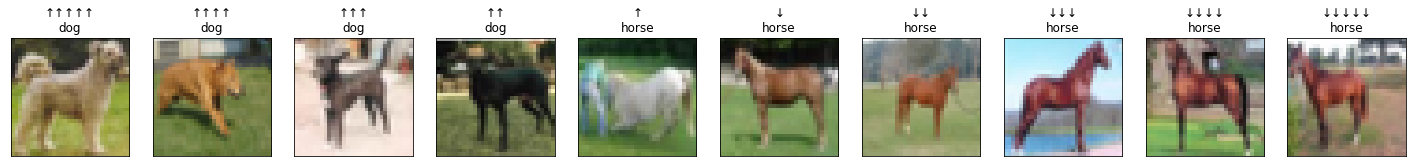

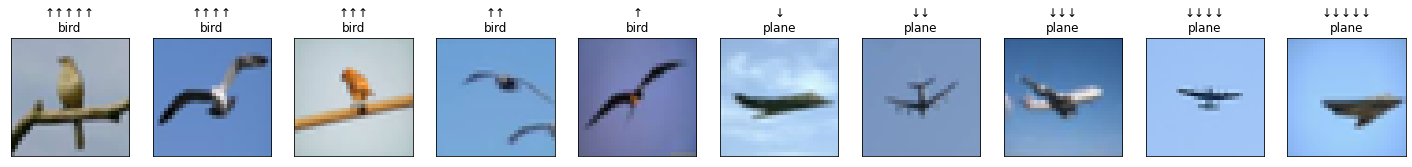

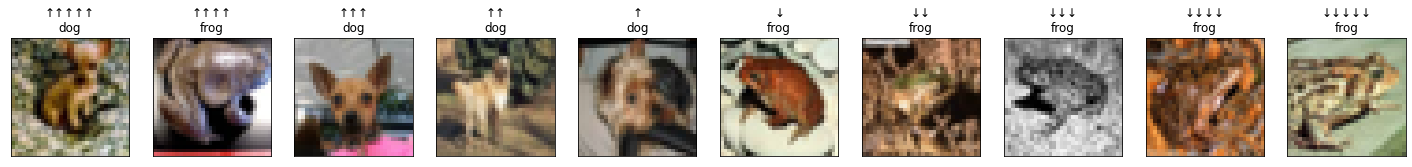

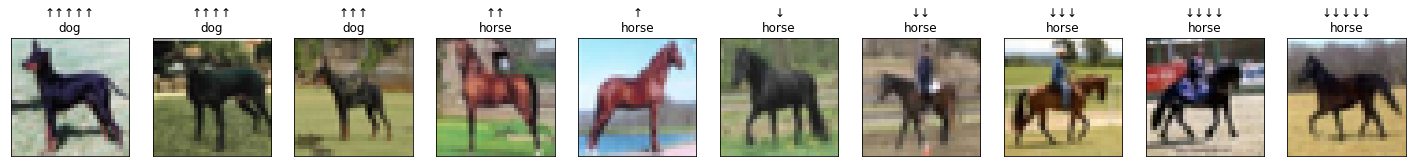

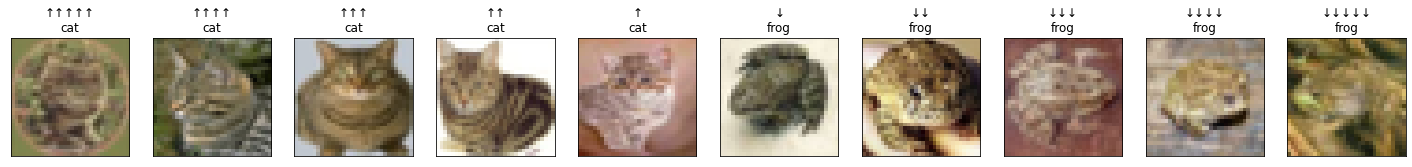

In [9]:
DF = DatamodelFunctions(dm_path = 'src/data-rv/results/result_1/val_margins_dm/eps_1e-2/datamodels.pt',
                        ds_path = '/home/gridsan/groups/robustness/datasets/cifar')

trans_embeds = DF.PCA(n_components = 5)
DF.vis_PCA(trans_embeds, N = 5)

### **Influencers**

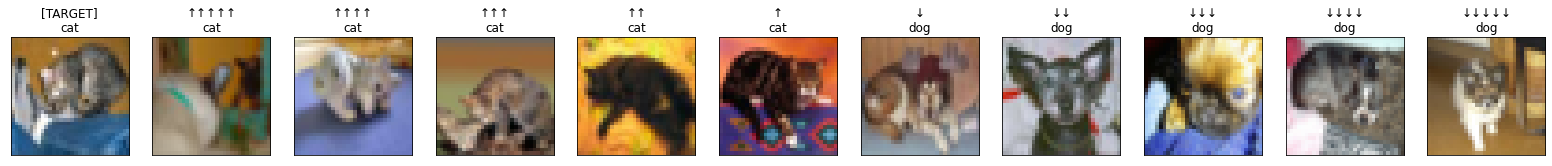

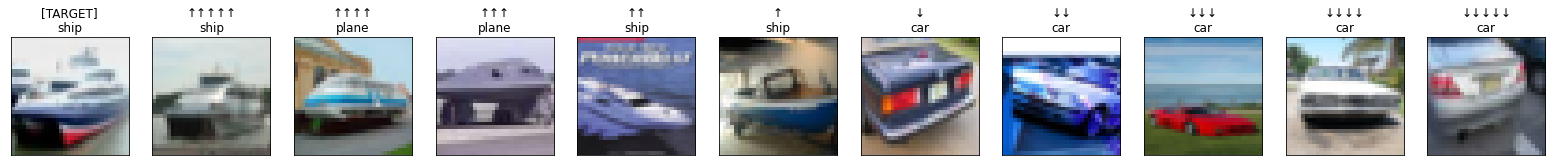

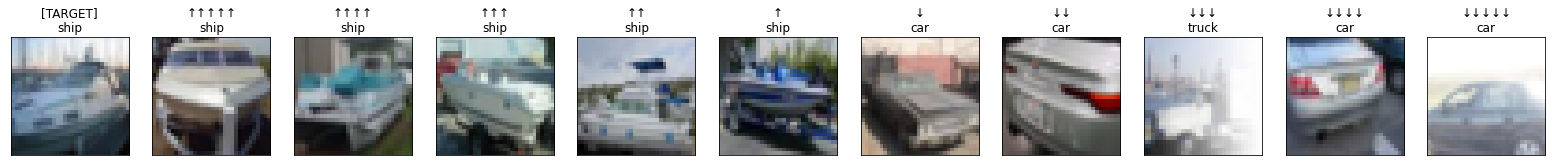

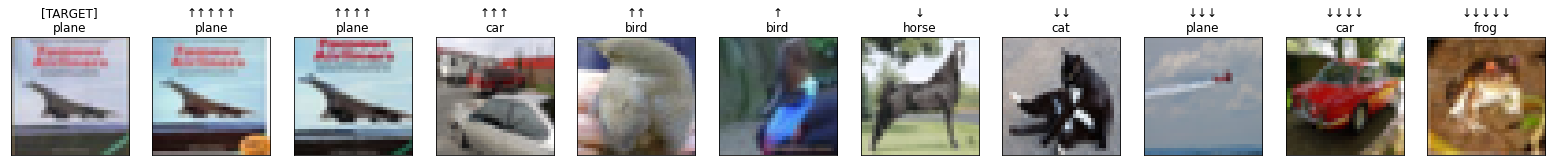

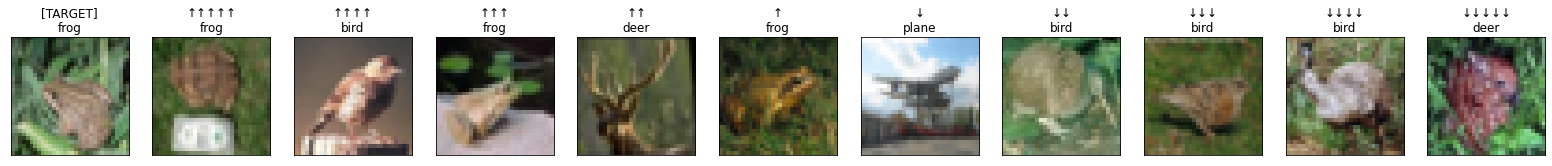

In [10]:
DF.vis_infl(N = 5, M = 5)

## **Epsilon = 1e-3**

### **PCA**

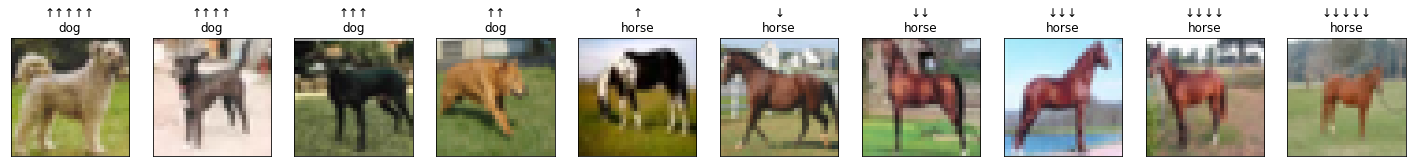

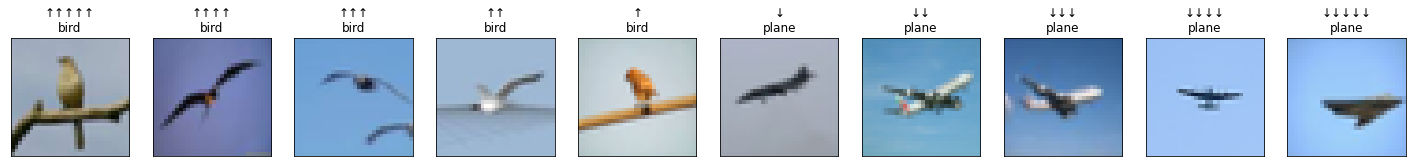

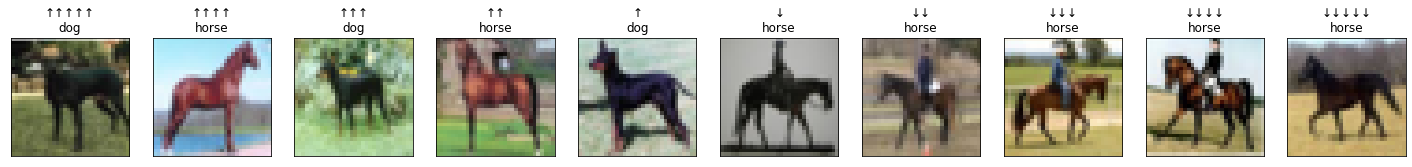

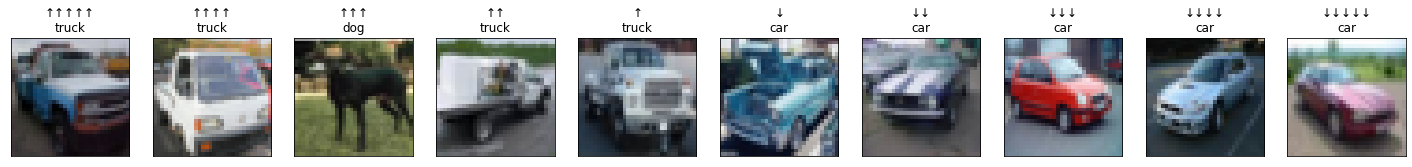

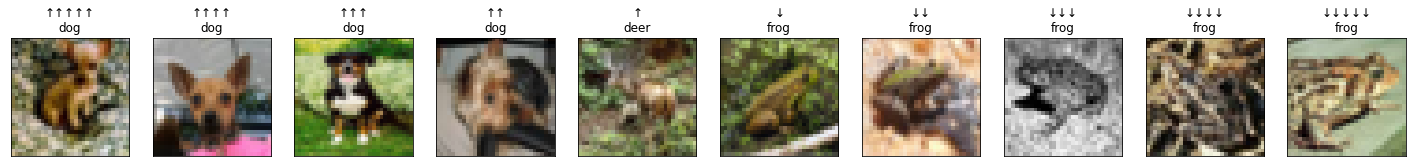

In [11]:
DF = DatamodelFunctions(dm_path = 'src/data-rv/results/result_1/val_margins_dm/eps_1e-3/datamodels.pt',
                        ds_path = '/home/gridsan/groups/robustness/datasets/cifar')

trans_embeds = DF.PCA(n_components = 5)
DF.vis_PCA(trans_embeds, N = 5)

### **Influencers**

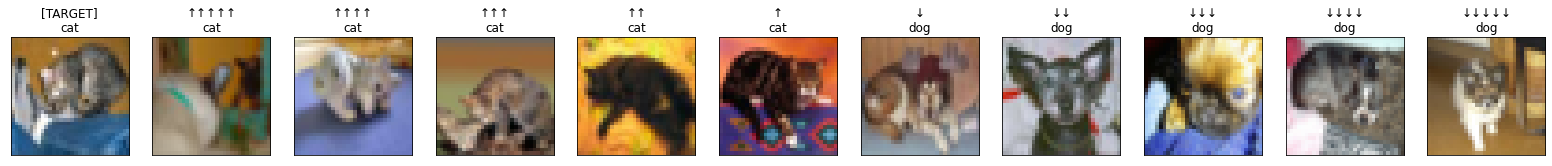

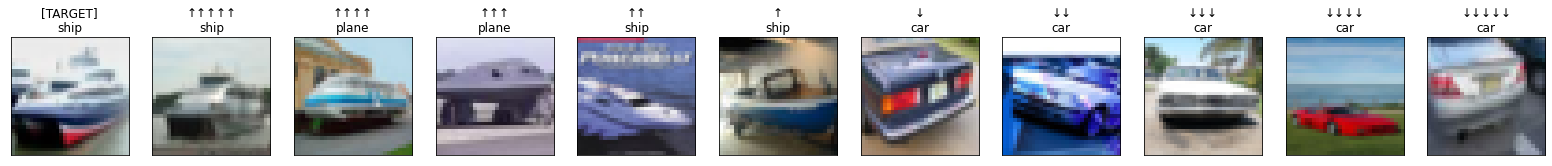

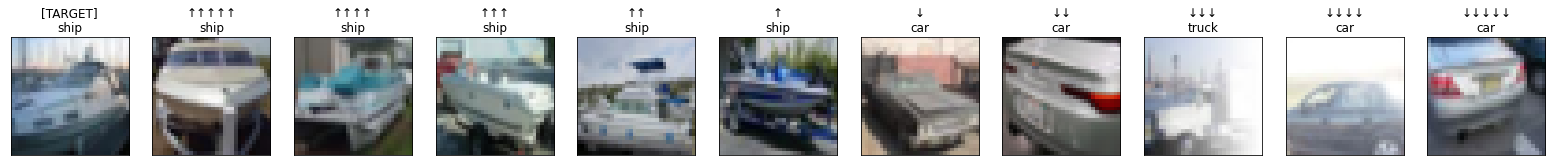

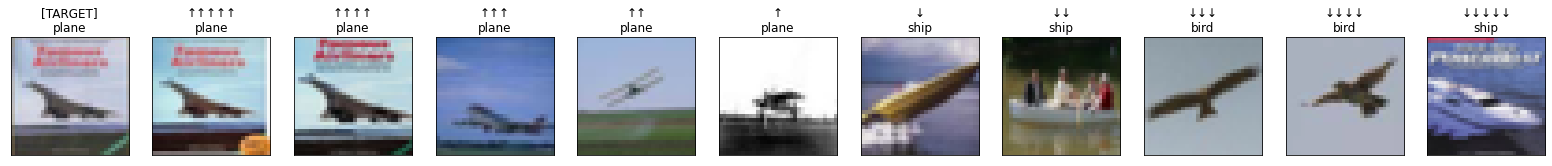

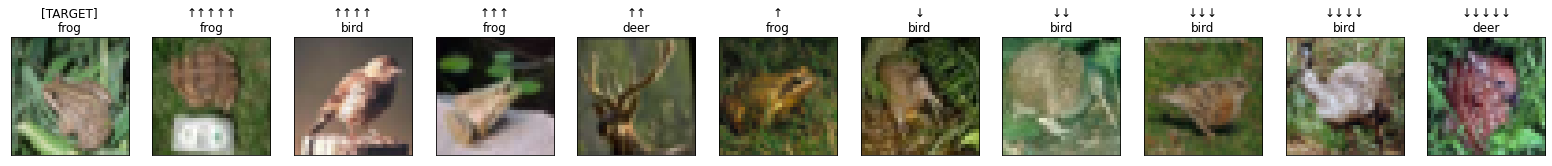

In [12]:
DF.vis_infl(N = 5, M = 5)

## **Epsilon = 1e-4**

### **PCA**

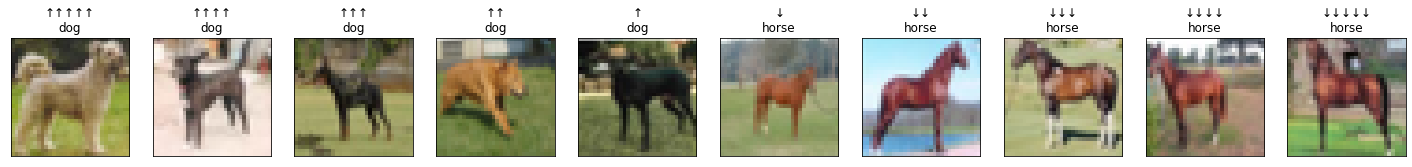

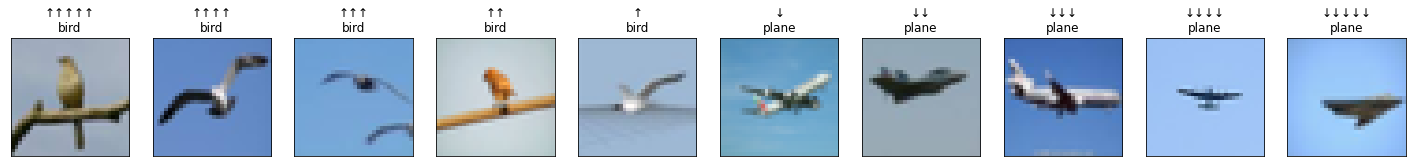

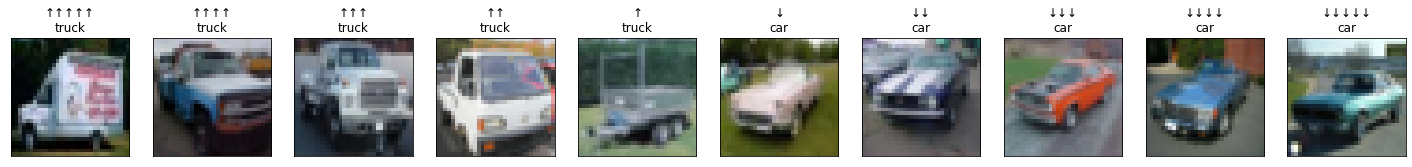

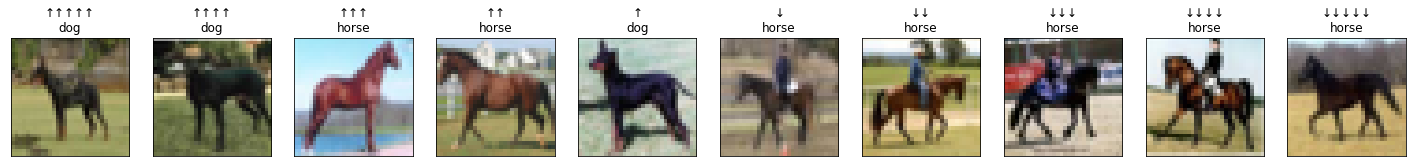

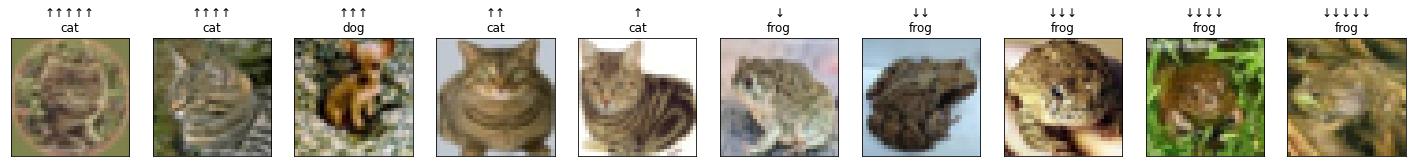

In [13]:
DF = DatamodelFunctions(dm_path = 'src/data-rv/results/result_1/val_margins_dm/eps_1e-4/datamodels.pt',
                        ds_path = '/home/gridsan/groups/robustness/datasets/cifar')

trans_embeds = DF.PCA(n_components = 5)
DF.vis_PCA(trans_embeds, N = 5)

### **Influencers**

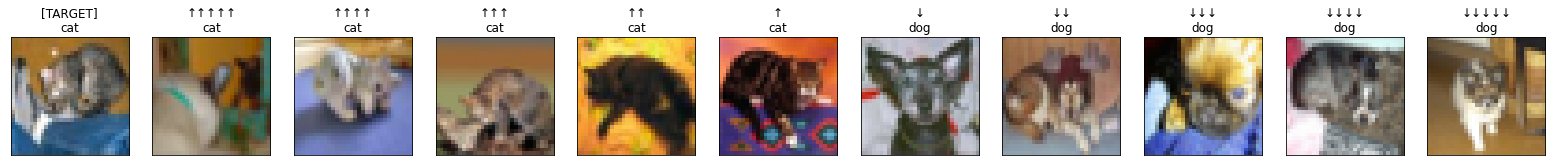

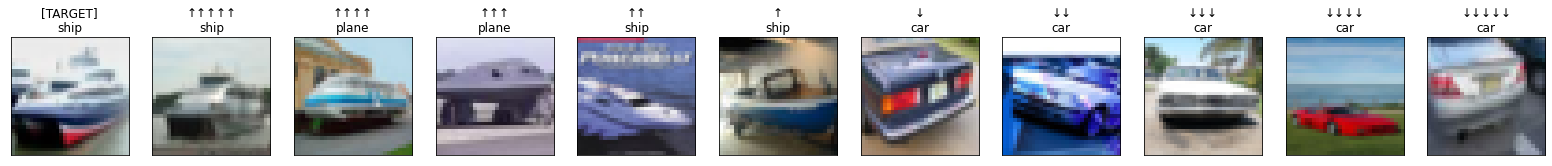

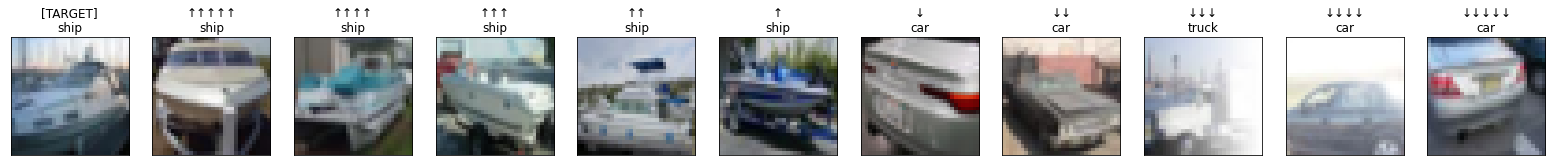

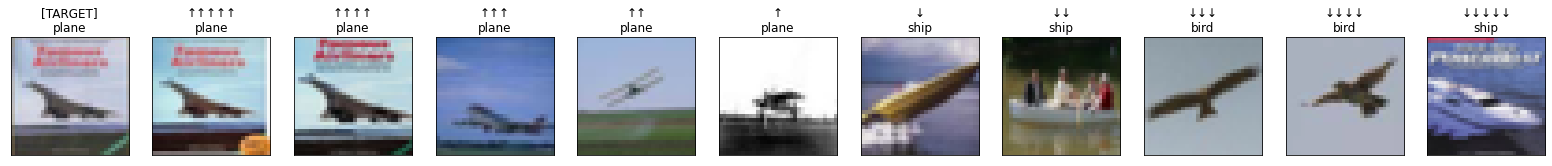

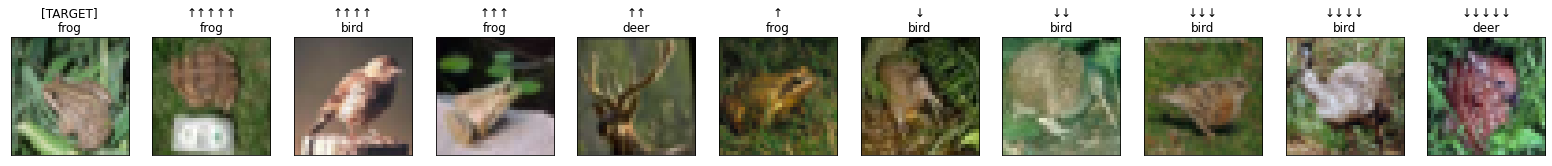

In [14]:
DF.vis_infl(N = 5, M = 5)

## **Epsilon = 1e-5**

### **PCA**

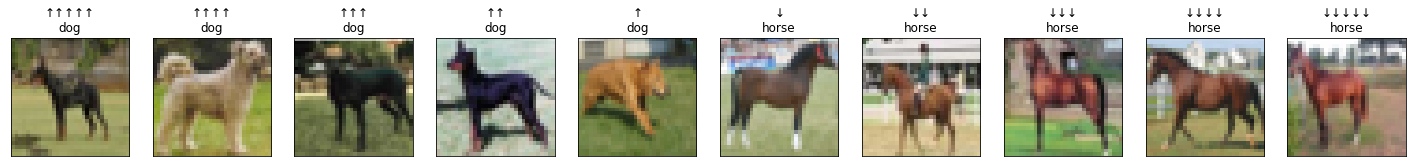

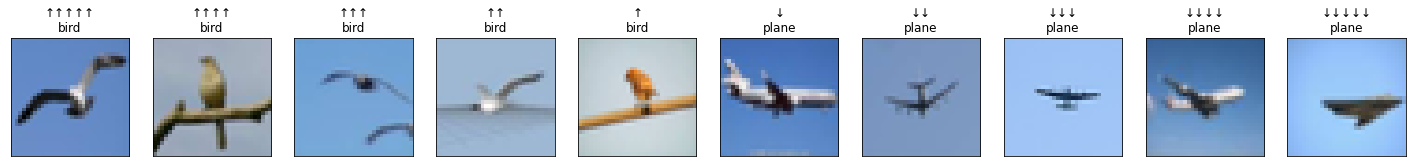

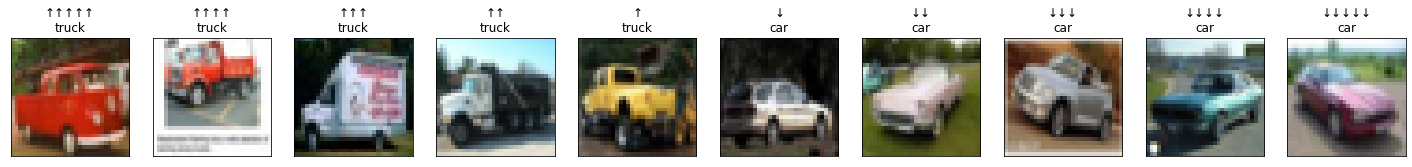

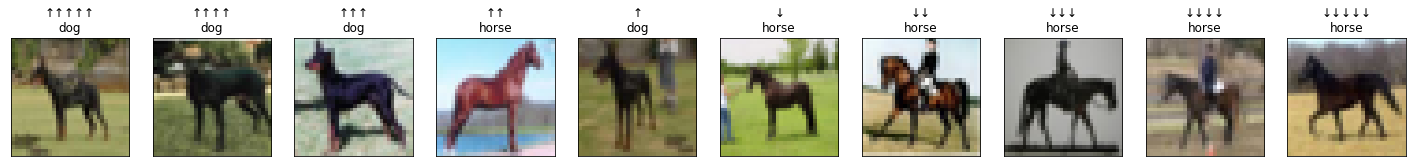

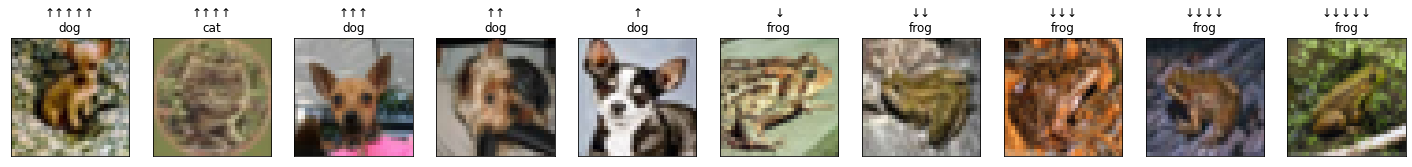

In [18]:
DF = DatamodelFunctions(dm_path = 'src/data-rv/results/result_1/val_margins_dm/eps_1e-5/datamodels.pt',
                        ds_path = '/home/gridsan/groups/robustness/datasets/cifar')

trans_embeds = DF.PCA(n_components = 5)
DF.vis_PCA(trans_embeds, N = 5)

### **Influencers**

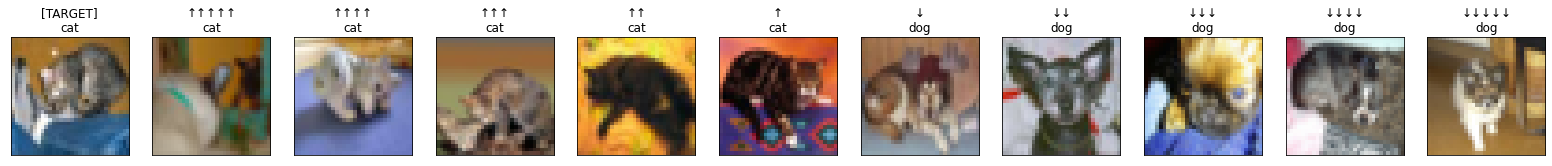

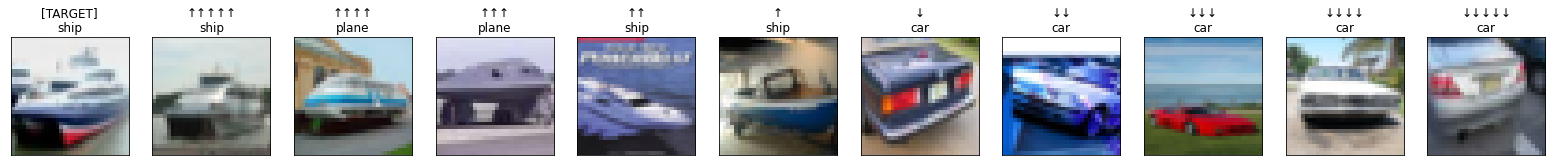

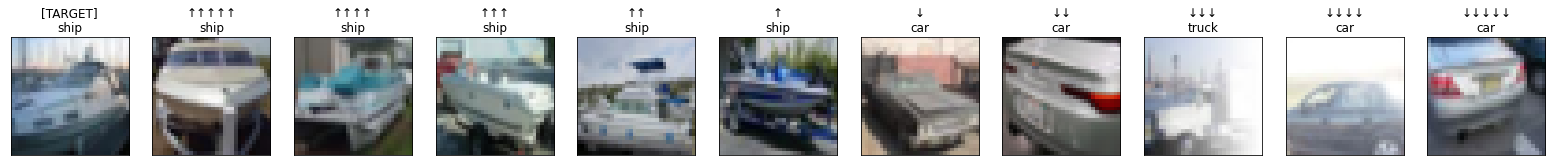

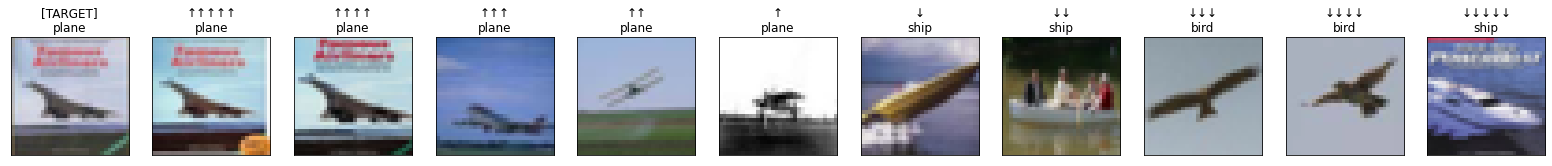

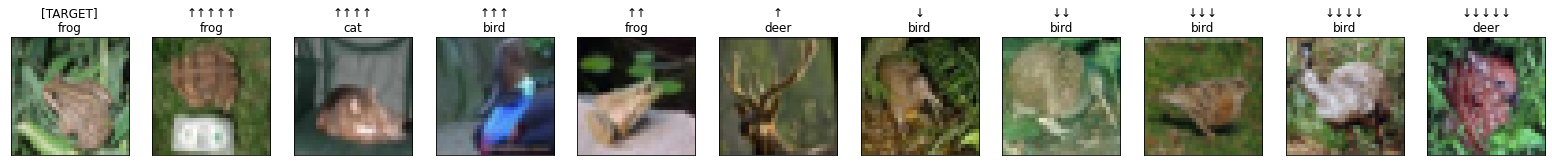

In [16]:
DF.vis_infl(N = 5, M = 5)